In [1]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import BinaryCrossentropy

In [2]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [3]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # 2 classes for binary classification
model = Model(inputs=base_model.input, outputs=predictions)

In [4]:
for layer in base_model.layers:
    layer.trainable = False

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
train_dataset = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'C:/Users/Aditi Bolakhe/Desktop/drowsy detection/cnn1/training',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_dataset = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'C:/Users/Aditi Bolakhe/Desktop/drowsy detection/cnn1/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [7]:
num_classes = 2

In [8]:
train_labels = to_categorical(train_dataset.labels, num_classes=num_classes)
val_labels = to_categorical(val_dataset.labels, num_classes=num_classes)

In [9]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)

Epoch 1/10


C:\Users\Aditi Bolakhe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 132s 3s/step - accuracy: 0.7495 - loss: 0.7158 - val_accuracy: 1.0000 - val_loss: 0.0250
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 112s 3s/step - accuracy: 1.0000 - loss: 0.0186 - val_accuracy: 1.0000 - val_loss: 0.0064
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 112s 3s/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 112s 3s/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 112s 3s/step - accuracy: 1.0000 - loss: 8.7207e-04 - val_accuracy: 1.0000 - val_loss: 8.4366e-04
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 120s 3s/step - accuracy: 1.0000 - loss: 6.4365e-04 - val_accuracy: 1.0000 - 

In [10]:
scores = model.evaluate(val_dataset, verbose=0)
print(f"Test loss: {scores[0]}")
print(f"Test accuracy: {scores[1]}")

Test loss: 0.00042718485929071903
Test accuracy: 1.0


In [11]:
model.save('densenet.h5')

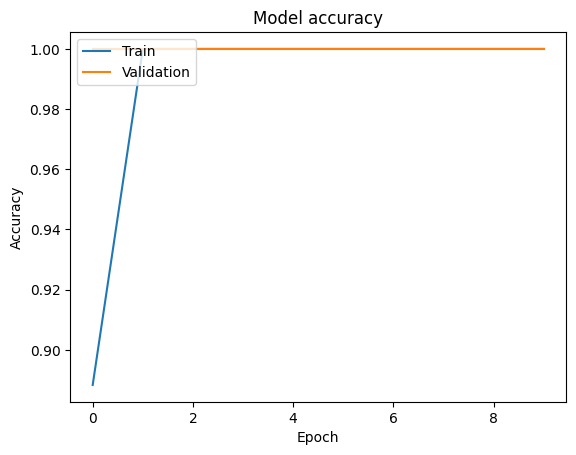

Final Training Accuracy: 1.0
Final Validation Accuracy: 1.0


In [12]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Print the final training and validation accuracy
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {train_accuracy}")
print(f"Final Validation Accuracy: {val_accuracy}")

In [13]:
print("Hyperparameters:")
print("Optimizer: Adam")
print("Loss function: Categorical Crossentropy")
print("Batch size: 32")
print("Number of epochs: 10")
print("Learning Rate: Default (0.001 for Adam)")

Hyperparameters:
Optimizer: Adam
Loss function: Categorical Crossentropy
Batch size: 32
Number of epochs: 10
Learning Rate: Default (0.001 for Adam)
